Machine Learning Assignment 1

In [ ]:

"""
Question:
What are the three stages to build the hypotheses or model in machine learning?
"""
"""
Answer:
1.Model building
2.Model testing
3.Applying the model

"""

In [ ]:

"""
Question:
What is the standard approach to supervised learning?
"""
"""
Answer:
In supervised learning we gather labeled data and we apply data preprocessing and cleaning on the data sets. Then we divide the 
into training sets and test sets. 80:20 ratio is considered as a good proportion for train-test-split.
Then we again divide the training data into further new training data sets and validation data sets.
we choose one of the suitable algorithm.Then we train machine learning model on new training data sets and 
tune+evaluate the model using validation data.once the model is performing well on validation data
then we test the model over test set. if the prediction is not accurate to 
our expectation, we repeat the steps.
"""

In [ ]:

"""
Question:
What is Training set and Test set?
"""
"""
Answer:
In machine learning, a training set is a dataset used to train a model. In training the model, specific features are picked out 
from the training set. These features are then incorporated into the model.
The test set is a dataset used to measure how well the model performs at making predictions on that test set.
"""

In [ ]:

"""
Question:
What is the general principle of an ensemble method and what is bagging and
boosting in ensemble method?
"""

"""
Answer:
The general principle of an ensemble method is to combine the predictions of several models built with a given learning algorithm
in order to improve robustness over a single model.
Bagging is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several 
subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their 
decision trees.
Boosting is an ensemble method for improving the model predictions of any given learning algorithm. The idea of boosting is to 
train weak learners sequentially, each trying to correct its predecessor.
"""

In [ ]:

"""
Question:
How can you avoid overfitting ?
"""
"""
Answer:
There are few methods to prevents from overfitting
1.Cross-validation
2.Train with more data
3.Remove features
4.Early stopping
5.Ensembling(Bagging and boosting)
"""

Machine Learning Assignment 2

In [1]:
"""
Question:
Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.
"""
import numpy as np #importing numpy library
import pandas as pd #importing pandas library
import scipy.stats as stats #import scipy.stats
import matplotlib.pyplot as plt #importing matplotlib.pyplot
import sklearn #import sklearn 
from sklearn.datasets import load_boston #importing the dataset

boston = load_boston() #loading the dataset into boston 
bos_df = pd.DataFrame(boston.data,columns=boston.feature_names) #loading the data into bos_df

bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
bos_df['price']=boston.target # adding the price column to the bos_df
bos_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:

print(bos_df.dtypes) #gives columns values
bos_df.describe()

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:

bos_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

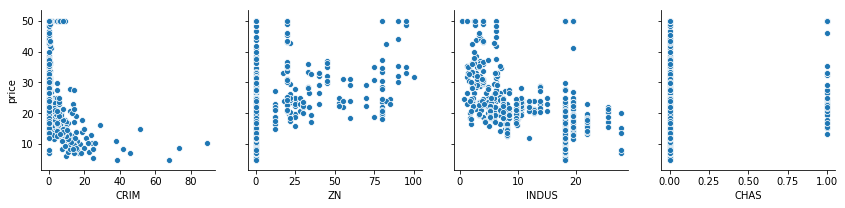

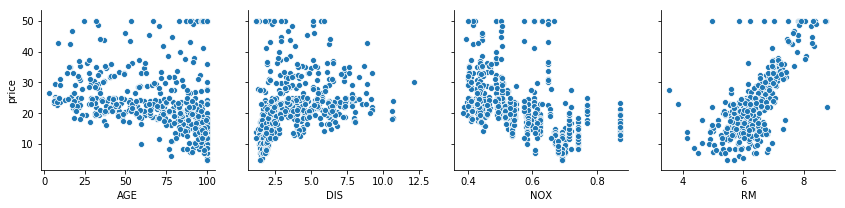

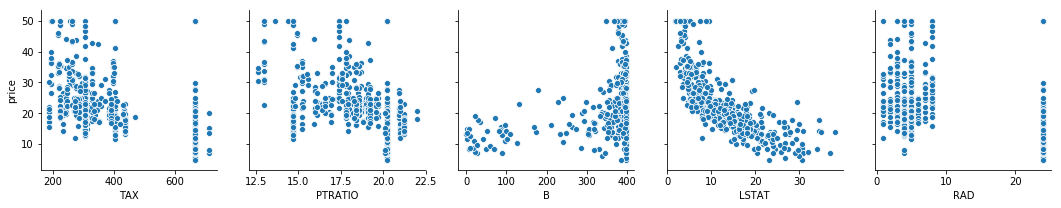

In [5]:
import seaborn as sb #importing the library
x1_vars=['CRIM','ZN','INDUS','CHAS']
x2_vars=['AGE','DIS','NOX','RM']
x3_vars=['TAX','PTRATIO','B','LSTAT','RAD']
y_vars=['price']

#drawing pair-plot to see the relationship between independent and dependent variables
sb.pairplot(bos_df, x_vars=x1_vars, y_vars=y_vars, height=3, aspect=1, kind='scatter')
sb.pairplot(bos_df, x_vars=x2_vars, y_vars=y_vars, height=3, aspect=1, kind='scatter')
sb.pairplot(bos_df, x_vars=x3_vars, y_vars=y_vars, height=3, aspect=1, kind='scatter')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x1=bos_df.loc[:,['CRIM','ZN','INDUS','CHAS','AGE','DIS','NOX','RM','TAX','PTRATIO','B','LSTAT','RAD']] #slicing
y=bos_df.loc[:,['price']] #slicing

#adding q0 as features with default value 1 to reduce the bias in the model
df1 = pd.DataFrame({'q0':np.ones(len(bos_df)).astype(int)}) 
x=df1.join(x1) 

#partitioning into test and train data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
regressor =LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The Mean absolute error(MAE) of the model on selecting all features is 3.842909220444501
The R-squared error of the model on selecting all features is 0.5892223849182496


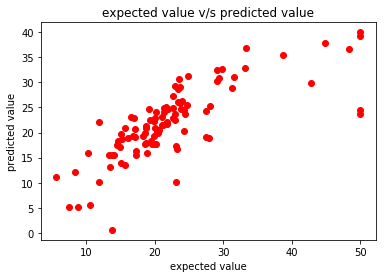

In [8]:

from sklearn import metrics # importing library
import matplotlib.pyplot as plt # importing library
y_predict=regressor.predict(x_test) #predicting the test value
print("The Mean absolute error(MAE) of the model on selecting all features is",metrics.mean_absolute_error(y_test,y_predict))
print("The R-squared error of the model on selecting all features is",regressor.score(x_test,y_test))

#plotting the expected value v/s predicted value
plt.scatter(y_test,y_predict,color='red')
plt.title('expected value v/s predicted value')
plt.xlabel('expected value')
plt.ylabel('predicted value')
plt.show()

In [10]:
"""building the optimal model using backward elimination.let us assume sig level =.05 """
import statsmodels.api as sm
# including all the features in the beginning adjusted R-squared:0.734
x_opt =x_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
regressor_OLS =sm.OLS(endog=y_train,exog=x_opt).fit()
# print(regressor_OLS.summary())

# removing INDUS features because of large p value
x_opt =x_train.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13]]
regressor_OLS =sm.OLS(endog=y_train,exog=x_opt).fit()
# print(regressor_OLS.summary())

# removing INDUS and Age features because of large p value
x_opt =x_train.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13]]
regressor_OLS =sm.OLS(endog=y_train,exog=x_opt).fit()
# print(regressor_OLS.summary())

# removing INDUS, CHAS and Age features because of large p value
x_opt =x_train.iloc[:,[0,1,2,6,7,8,9,10,11,12,13]]
regressor_OLS =sm.OLS(endog=y_train,exog=x_opt).fit()
print(regressor_OLS.summary()) # Now we are getting all features with p value less than 0.5

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     130.8
Date:                Tue, 17 Dec 2019   Prob (F-statistic):          2.01e-118
Time:                        07:46:20   Log-Likelihood:                -1175.0
No. Observations:                 404   AIC:                             2372.
Df Residuals:                     393   BIC:                             2416.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
q0            38.3885      5.517      6.958      0.0

The optimized Mean absolute error(MAE) of the model  is 3.8409835184616123
The optimized R-squared error of the model  is 0.5794875367843895


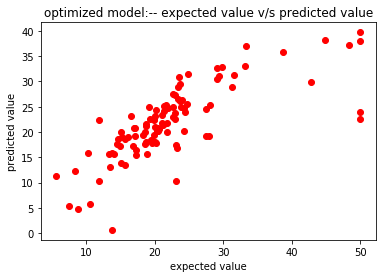

In [11]:

#Now we will create final model by removing INDUS and Age features because of large p value
regressor_opt =LinearRegression()
x_train_opt = x_train.iloc[:,[0,1,2,6,7,8,9,10,11,12,13]]
x_test_opt = x_test.iloc[:,[0,1,2,6,7,8,9,10,11,12,13]]
regressor_opt.fit(x_train_opt,y_train)
y_predict_opt=regressor_opt.predict(x_test_opt)

print("The optimized Mean absolute error(MAE) of the model  is",metrics.mean_absolute_error(y_test,y_predict_opt))
print("The optimized R-squared error of the model  is",regressor_opt.score(x_test_opt,y_test))

#plotting the expected value v/s predicted value
plt.scatter(y_test,y_predict_opt,color='red')
plt.title('optimized model:-- expected value v/s predicted value')
plt.xlabel('expected value')
plt.ylabel('predicted value')
plt.show()

Machine Learning Assignment 3

Problem Statement
I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [15]:

# load dataset
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [16]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [17]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [18]:
%matplotlib inline

Text(0, 0.5, 'Frequency')

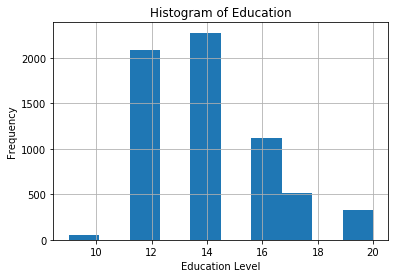

In [19]:
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

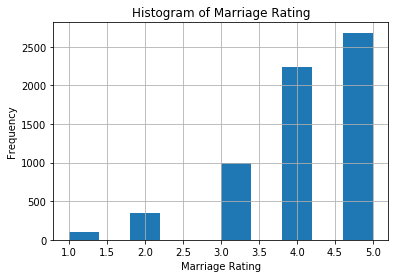

In [20]:
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

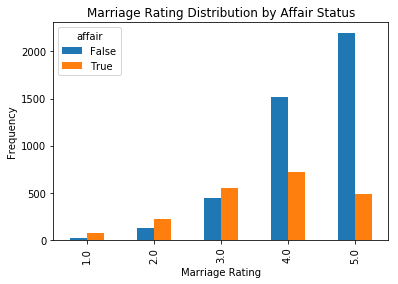

In [21]:
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Percentage')

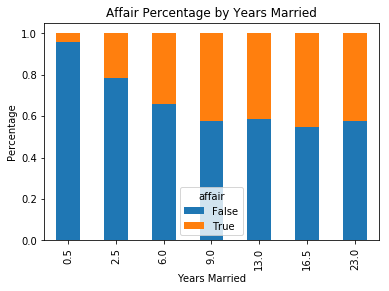

In [22]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [23]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [24]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [25]:
y = np.ravel(y)


In [26]:
model = LogisticRegression(solver='lbfgs', max_iter = 1000)
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.726358781024191

In [27]:

# what percentage had affairs?
y.mean()

0.3224945020420987

In [28]:
X.columns, np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'), array([[-0.01777842],
        [ 0.05754073],
        [ 0.37045011],
        [ 0.13698414],
        [ 0.71663181],
        [ 0.73660808],
        [ 0.14580945],
        [ 0.25116719],
        [ 0.11692146],
        [ 0.14640246],
        [ 0.15843268],
        [-0.70993765],
        [-0.06080811],
        [ 0.10775517],
        [ 0.01558088],
        [-0.37437151],
        [-0.00146514]]))

In [29]:

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression(solver='lbfgs', max_iter = 1000)
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
predicted = model2.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [31]:
probs = model2.predict_proba(X_test)
probs

array([[0.34754357, 0.65245643],
       [0.91197492, 0.08802508],
       [0.72746668, 0.27253332],
       ...,
       [0.56280028, 0.43719972],
       [0.81076834, 0.18923166],
       [0.75015089, 0.24984911]])

In [32]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.731413612565445
0.7462224419379433


print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

In [34]:
scores = cross_val_score(LogisticRegression(solver='lbfgs', max_iter = 1000), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72100313, 0.70219436, 0.73981191, 0.70597484, 0.70440252,
        0.73113208, 0.7327044 , 0.70440252, 0.75314465, 0.74685535]),
 0.7241625756589973)

In [35]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,
                              16]]))

array([[0.77547304, 0.22452696]])

Assignment 4

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')


url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


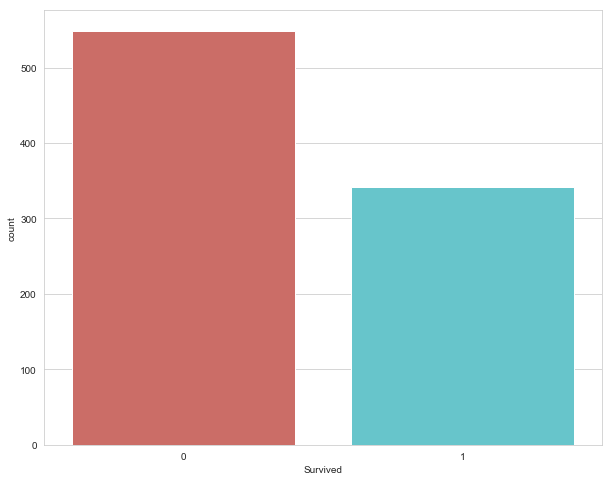

In [3]:
sb.countplot(x='Survived',data=titanic, palette='hls')

titanic.isnull().sum()
titanic.info()
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic_data.head()

In [4]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [5]:

titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_data.isnull().sum()
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


,Survived,Age,SibSp,Parch,male,Q,S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,0,1,0,1


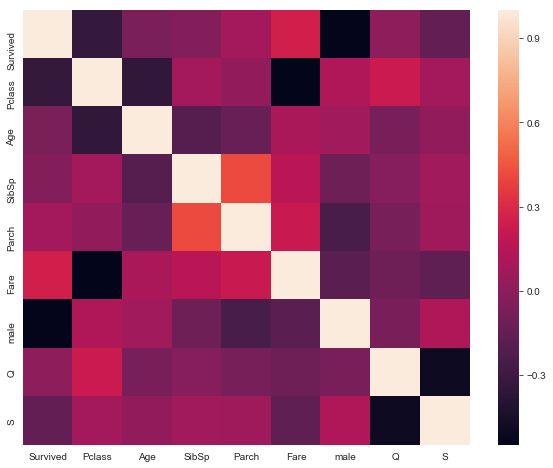

In [6]:
embark_location = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark_location.head()
titanic_data.head()
titanic_data.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_data.head()
titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)
titanic_dmy.head()
sb.heatmap(titanic_dmy.corr())  
titanic_dmy.drop(['Fare', 'Pclass'],axis=1,inplace=True)
titanic_dmy.head()

In [7]:
X = titanic_dmy.iloc[:,:-1].values
y = titanic_dmy.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
LogReg = LogisticRegression(solver='lbfgs', max_iter = 500)
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       103

   micro avg       1.00      1.00      1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



Assignment 5

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['price'] = boston.target

In [9]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [10]:
bos.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [11]:
X = bos.iloc[:,0:-1]
y = bos.iloc[:,-1]

In [12]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle = True, random_state=12)

In [13]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
for train_fold, valid_fold in cv.split(X):
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = regressor.fit(X = train, y = train_y)
    model_pred = model.predict(X = valid)
    errors = abs(model_pred - valid_y)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2.44


In [14]:
model_pred[0:10]

array([14.82, 19.82, 23.55, 24.1 , 23.17, 28.21, 23.99, 19.64, 18.83,
       19.65])

In [15]:
valid_y[0:10].values

array([14.8, 19.4, 23.4, 24.1, 24.8, 28.7, 27.5, 20.1, 19.4, 21.7])

In [16]:

# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [17]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:

y_pred = regressor.predict(X_test)

In [21]:
y_test[0:10].values

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [22]:
y_pred[0:10]

array([22.48, 30.03, 17.75, 22.98, 16.24, 21.69, 21.13, 16.3 , 20.66,
       19.96])

In [23]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2.06


Observation :

Applying 10 fold cross validation on datapoints and fitting those in random forest regressor, Mean absolute error value is 2.44 as opposed to Mean absolute error value of 2.06 while applying train test split in random forest regressor.

Assignment 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']
train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
train.columns = columns
test.columns = columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df = pd.concat([train, test], axis=0)
dff=df
k=df

df['wage_class'] = df['wage_class'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

In [4]:
df.replace(' ?', np.nan, inplace=True)###making copy for visualization

In [5]:
df = pd.concat([df, pd.get_dummies(df['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
df.drop('workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['marital_status'],prefix='marital_status',prefix_sep=':')], axis=1)
df.drop('marital_status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
df.drop('occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
df.drop('relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['race'],prefix='race',prefix_sep=':')], axis=1)
df.drop('race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['sex'],prefix='sex',prefix_sep=':')], axis=1)
df.drop('sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['native_country'],prefix='native_country',prefix_sep=':')], axis=1)
df.drop('native_country',axis=1,inplace=True)

df.drop('education', axis=1,inplace=True)

df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,...,native_country: Portugal,native_country: Puerto-Rico,native_country: Scotland,native_country: South,native_country: Taiwan,native_country: Thailand,native_country: Trinadad&Tobago,native_country: United-States,native_country: Vietnam,native_country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


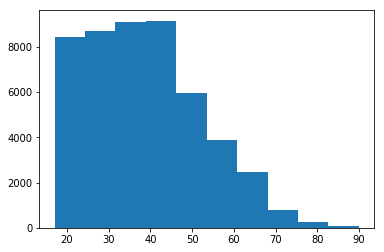

In [6]:
plt.hist(dff['age']);

dff['wage_class'] = dff['wage_class'].apply(lambda x: 1 if x==' >50K.' else 0)

dff.replace(' ?', np.nan, inplace=True)

In [7]:
dff.fillna(' 0', inplace=True)

dff['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 0                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X = np.array(df.drop(['wage_class'], 1))
y = np.array(df['wage_class'])
X = preprocessing.scale(X)
y = np.array(df['wage_class'])

#Splitting data as train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\Mounkia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [9]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [10]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.292436 using {'learning_rate': 0.3}
-0.687319 (0.000065) with: {'learning_rate': 0.0001}
-0.639648 (0.000612) with: {'learning_rate': 0.001}
-0.411178 (0.003790) with: {'learning_rate': 0.01}
-0.296699 (0.006355) with: {'learning_rate': 0.1}
-0.293722 (0.006446) with: {'learning_rate': 0.2}
-0.292436 (0.006631) with: {'learning_rate': 0.3}


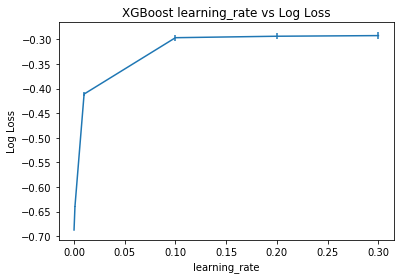

In [11]:
from matplotlib import pyplot
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')